In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Deep Feed Forward NN on MNIST & CIFAR-10

### Step 0: Setup & Imports

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(f"Tensorflow: {tf.__version__}")

# Warnings 
import warnings
warnings.filterwarnings('ignore')

Tensorflow: 2.18.0


### Step 1: Load & Preprocess Data
* Load the data
* Normalize the data
* Flatten data

#### MNIST
1. Reshaping -> Changing the way the data is structured in memory without altering the values
    * ANN/DFNN(Dense layers) -> needs 1D vectors (flattened images)
    * CNNs -> need 3D tensor(H, W, C) to preserve spatial info.i.e(60000, 28, 28) -> (60000, 784)
2. Normlization -> Scaling pixel values from [0, 255] to [0,1]
    * Keeps gradient stable during backprop and prevents large inputs thus faster Convergence
    * Makes training comparable across datasets. and it should be done before training, after reshaping i.e(x_train.astype('float32')/255.0
3. Flattening -> turning a matrix/tensor into a 1D vector.
   * Dense layers expect inputs as vectors.
   * Without flattening, the network won't know how to connect all pixels to neurons.
   * For ANN/DFNN -> must flatten before feeding images
   * For CNN -> flatten only after convolutional layers (before Dense).ie.(ANN -> x_train.reshape(-1, 784) CNN -> x_train = np.expand_dims(x_train, -1) (28,28) -> (28, 28, 1)

In [4]:
# Load the data , MNIST (28 x 28 grayscale)
(x_train_mnist, y_train_mnist),(x_test_mnist,y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Reshape and Normalize the data [0,1]
x_train_mnist, x_test_mnist = x_train_mnist.reshape(-1, 784).astype("float32")/255.0, x_test_mnist.reshape(-1, 784).astype("float32")/255.0

print(f"MNIST shape: {x_train_mnist.shape}")

MNIST shape: (60000, 784)


#### CIFAR10

In [8]:
# Load the data, CIFAR-1o (32 x 32 x 3 -> flatten to 3072 features)
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train_cifar10, x_test_cifar10 = x_train_cifar10.reshape(-1, 3072).astype('float32')/255.0, x_test_cifar10.reshape(-1, 3072).astype('float32')/255.0

# Flatten the targets
y_trian_cifar10, y_test_cifar10 = y_train_cifar10.flatten(), y_test_cifar10.flatten()


print(f"CIFAR10 shape:{x_train_cifar10.shape}")

CIFAR10 shape:(50000, 3072)


### Step 2: Define the DFNN model
* Using Sequential API (since it is sufficient for DFNN)
* Hidden layers Dense + ReLU
* Output Dense + softmax

#### MNIST

In [9]:
# Step 2a: Define the DFNN model
model_mnist = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### CIFAR-10

In [10]:
# Step 2b: Define the DFNN model
model_cifar10 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu',input_shape=(3072,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Step 3: Compile Model

In [11]:
# compile
model_mnist.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cifar10.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Step 4: Train the models

#### MNIST

In [12]:
# Train MNISt
history_mnist = model_mnist.fit(
    x_train_mnist, y_train_mnist,
    validation_split = .1,
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
422/422 - 6s - 14ms/step - accuracy: 0.9274 - loss: 0.2457 - val_accuracy: 0.9632 - val_loss: 0.1275
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.9724 - loss: 0.0896 - val_accuracy: 0.9723 - val_loss: 0.0961
Epoch 3/10
422/422 - 4s - 9ms/step - accuracy: 0.9819 - loss: 0.0571 - val_accuracy: 0.9793 - val_loss: 0.0737
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9866 - loss: 0.0399 - val_accuracy: 0.9778 - val_loss: 0.0740
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.9813 - val_loss: 0.0668
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.9911 - loss: 0.0278 - val_accuracy: 0.9783 - val_loss: 0.0800
Epoch 7/10
422/422 - 4s - 9ms/step - accuracy: 0.9927 - loss: 0.0208 - val_accuracy: 0.9790 - val_loss: 0.0823
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9828 - val_loss: 0.0792
Epoch 9/10
422/422 - 4s - 9ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9757 - val_loss: 0.1003


#### CIFAR10

In [13]:
# Train cifar10_model
history_cifar10 = model_cifar10.fit(
    x_train_cifar10, y_train_cifar10,
    validation_split=.1,\
    epochs=10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
352/352 - 16s - 46ms/step - accuracy: 0.3074 - loss: 1.9246 - val_accuracy: 0.3732 - val_loss: 1.7560
Epoch 2/10
352/352 - 14s - 39ms/step - accuracy: 0.3953 - loss: 1.6823 - val_accuracy: 0.4278 - val_loss: 1.6247
Epoch 3/10
352/352 - 14s - 38ms/step - accuracy: 0.4291 - loss: 1.5892 - val_accuracy: 0.4368 - val_loss: 1.5681
Epoch 4/10
352/352 - 13s - 38ms/step - accuracy: 0.4503 - loss: 1.5342 - val_accuracy: 0.4504 - val_loss: 1.5569
Epoch 5/10
352/352 - 13s - 38ms/step - accuracy: 0.4698 - loss: 1.4826 - val_accuracy: 0.4586 - val_loss: 1.5364
Epoch 6/10
352/352 - 13s - 38ms/step - accuracy: 0.4822 - loss: 1.4460 - val_accuracy: 0.4590 - val_loss: 1.5193
Epoch 7/10
352/352 - 13s - 37ms/step - accuracy: 0.4943 - loss: 1.4115 - val_accuracy: 0.4884 - val_loss: 1.4386
Epoch 8/10
352/352 - 13s - 38ms/step - accuracy: 0.5073 - loss: 1.3769 - val_accuracy: 0.4806 - val_loss: 1.4547
Epoch 9/10
352/352 - 13s - 38ms/step - accuracy: 0.5158 - loss: 1.3480 - val_accuracy: 0.4920 - 

### Step 5: Evaluate Model


In [16]:
# Evaluate both the MNIST and CIFAR10
mnist_loss, mnist_acc = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
# cifar10_loss, cifar10_acc = model_cifar10.evaluate(x_test_cifar10,y_test_cifar10, verbose=0)

print(f"MNIST Test Accuracy: {mnist_acc}")
# print(f"CIFAR10 Test Accuracy: {cifar10_acc}")

MNIST Test Accuracy: 0.9794999957084656


### Step 6: Visualize Accuracy vs Epochs

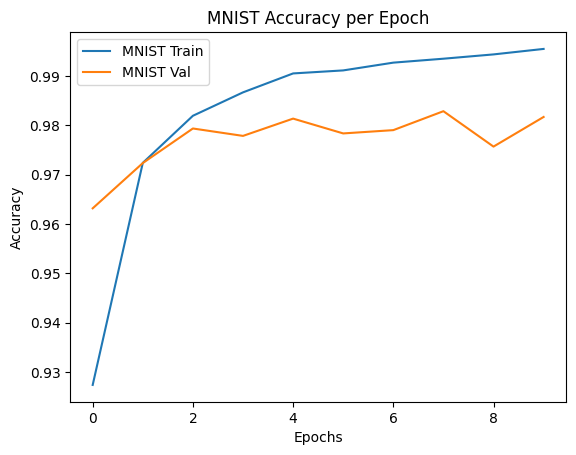

In [17]:
# Plot MNISt
plt.plot(history_mnist.history['accuracy'], label='MNIST Train')
plt.plot(history_mnist.history['val_accuracy'],label='MNIST Val')
plt.title("MNIST Accuracy per Epoch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

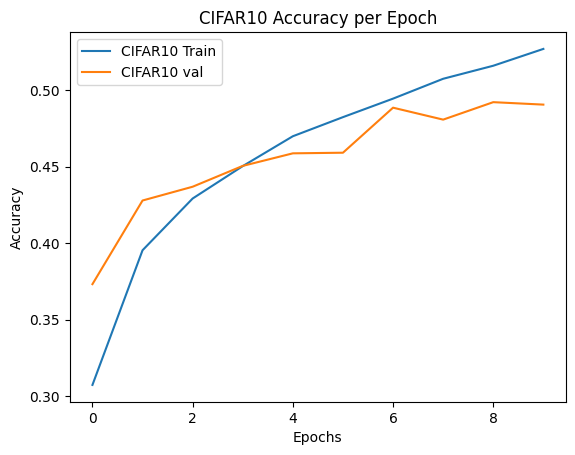

In [18]:
# Plot CIFAR10
plt.plot(history_cifar10.history['accuracy'], label='CIFAR10 Train')
plt.plot(history_cifar10.history['val_accuracy'],label='CIFAR10 val')
plt.title("CIFAR10 Accuracy per Epoch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 7: Notes & Observations
* MNIST: DFNN works well because the dataset is simple (small grayscale digits)
* CIFAR-10 DFNN Struggles because raw pixels don't capture spatial structure well. thus better with CNNs
* Activation Functions: ReLU is standard for hidden layers; softmax at the output. Sigmoid/Tanh generally underperform here (slower convergence, vanishing gradients)